# Предсказания ВР с использованием Deep Learning


## Причины выбора DL

Большенство моделей прогнозирования с глубоким обучением являются моделями __[глобального прогнозирования](https://unit8.com/resources/training-forecasting-models/)__. Это означает, что эти модели могут быть обучены на нескольких рядах и могут прогнозировать будущие значения любых временных рядов, даже рядов, которые не содержатся в обучающем наборе. Напротив, все  модели прогнозирования, не основанные на нейронной сети, (`ARIMA`, экспоненциальное сглаживание и т.д.)  являются __локальными моделями__, они обучаются на одном временном ряду для прогнозирования будущего именно этого ряда.

Отметим, что модели на основе глубоких нейронных сетей имеют особые [приемущества](https://github.com/thuml/Time-Series-Library?tab=readme-ov-file#leaderboard-for-time-series-analysis) в задачах предсказания продолжительного контекста, данных с пропусками и аномалиями.

Возможность обучать одну модель на основе нескольких рядов данных является очень важной особенностью, поскольку обычно модели глубокого обучения лучше всего проявляют себя, когда они обучаются на большом объеме данных. Это позволяет им сопоставлять закономерности в потенциально большом количестве связанных временных рядов. Например, модель `N-BEATS` обеспечивает превосходные результаты прогнозирования при обучении на десятках тысяч временных рядов в `M4 competition` (хорошо известном соревновании по прогнозированию).

Отметим следующие приемущества использования глубокого обучения нейронных сетей в задачах предсказания временных рядов:
* НС могут обрабатывать последовательные данные различной длины, эффективно улавливая долгосрочные зависимости и временные закономерности.
* НС учитывают неравномерно распределенные временные интервалы а также пропуски и выборсы во временных рядах.
* НС адаптируются к различным задачам прогнозирования с входными и выходными последовательностями различного соотношения длины.
* НС позволяют работать с данными в любых отношениях (напр. многокомпонентные, иерархические ряды, ряды с ковариатами и т.д.)
Однако, 



Глубокая нейронная сеть.
*	Нет необходимости в статистической гипотезе или конкретной форме модели.
*	Может аппроксимировать любую функцию с пропущенными данными, аномалиями и другими нерегулярными шаблонами.
•	Позволяют работать с огромными многомерными рядами данных со сложной взаимосвязью поведения между данными.
•	Автоматически извлекают и обрабатывают сложные признаки и отношения между ними.
•	Для сложных и многомерных данных в большом количестве модели, управляемые данными, могут обеспечить лучшую производительность.
НО
•	Требуется тщательная настройка гиперпараметров.
•	Часто требуется ансамбль сетей для получения высокой точности.
•	Тяжело перетренировать.
•	Трудно достичь сопоставимой точности с подходом на основе модели для относительно простых рядов.



## Импорт данных и библиотек

В данной работе мы изучим возможности использования библиотеки [`NeuralForecast`](https://nixtlaverse.nixtla.io/neuralforecast) для решения задачи предсказания ВР с использованием методов глубокого обучения нейронных сетей. В библиотеке `NeuralForecast` используются современные DL-модели  как мощные модели, например  `TFT` и `NHITS`позволяют обрабатывать сложные нелинейные зависимости в данных временных рядов, так и классические модели типа `LSTM`. Приемуществами [`NeuralForecast`](https://nixtlaverse.nixtla.io/neuralforecast/examples/statsmlneuralmethods.html) является

Ключевые особенности [NeuralForecast](https://nixtlaverse.nixtla.io/neuralforecast/examples/statsmlneuralmethods.html#neuralforecast) включают:
* Широкая коллекция глобальных моделей. Реализация `MLP`, `LSTM`, `NBEATS`, `NHITS`, `Informer`, `PatchTST` [и других](https://nixtlaverse.nixtla.io/neuralforecast/models.html) моделей из коробки. При этом ряд моделей имеют режимы автонастройки. Также фреймворк позволет сравнительно просто тестировать сразу наборы моделей.
* Простой и интуитивно понятный интерфейс "SKLearn-like", позволяющий проводить обучение, прогнозирование и бэктестирование различных моделей всего в нескольких строках кода.
* Поддержка `GPU`-ускорения для повышения скорости вычислений.
* фреймворк построен на основе фреймворков [`PyTorch`](https://pytorch.org/get-started/locally/) и [`PyTorch Lightning`](https://pypi.org/project/pytorch-lightning/).

In [4]:
import warnings
warnings.filterwarnings("ignore", ".*does not have many workers.*")

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

В работе мы будем использовать изучаемый нами временной ряд `Consumption`. Однако, для увеличения длины набора данных в этой работе мы возьмем его с шагом $1$ день вместо $7$ дней - как это делалось ранее. Кроме того приведем ряд к стандартному формату [`Nixtla`](https://nixtlaverse.nixtla.io/neuralforecast/examples/statsmlneuralmethods.html#download-and-prepare-data) - длинному формату ([`long`](https://nixtlaverse.nixtla.io/neuralforecast/examples/data_format.html)): 
* `unique_id` (строка, int или категория) представляет собой идентификатор каждой компоненты ВР.
* столбец `ds` (`datestamp` или `int`) должен быть либо целым числом, индексирующим время, либо датой, например в формате `YYYY-MM-DD` или `YYYY-MM-DD HH:MM:SS` для временной метки.
* `Y` (числовой столбец) представляет измерение, которое мы хотим исследовать. 

In [6]:
path_ts = 'de_data.csv'
df_ = pd.read_csv(path_ts, parse_dates=['Date'], index_col="Date")
y  = df_.Consumption.asfreq('1d')
FREQ = y.index.freq
df = pd.DataFrame(y)
df['ds'] = df.index
df.insert(0, 'unique_id', 'Consumption')
# df['ds'] = pd.to_datetime(df['ds'])
df = df.reset_index(drop=True)
df = df.rename(columns={"Consumption": "y"})
df.tail(3)

,unique_id,y,ds
1823,Consumption,1087.074,2019-12-29
1824,Consumption,1200.045,2019-12-30
1825,Consumption,1124.933,2019-12-31


Выбирем последние пол года как тестовую выборку. Остальные несколько лет будут тренировочными. В том числе последений год перед тестом сделаем валидационной выборкой.

In [10]:
test_size = 26*7
val_size  = 52*7
train_size = df.shape[0] - test_size - val_size
val_size, test_size, train_size

(364, 182, 1280)

In [8]:
threshold_time = df['ds'].max() - pd.Timedelta(days=test_size)

df_train = df[df['ds'] <= threshold_time]
df_test  = df[df['ds'] > threshold_time]

# val_size = int(df_train.shape[0]*0.3)
df_test.shape, df_train.shape[0]-val_size, val_size

((182, 3), 1280, 364)

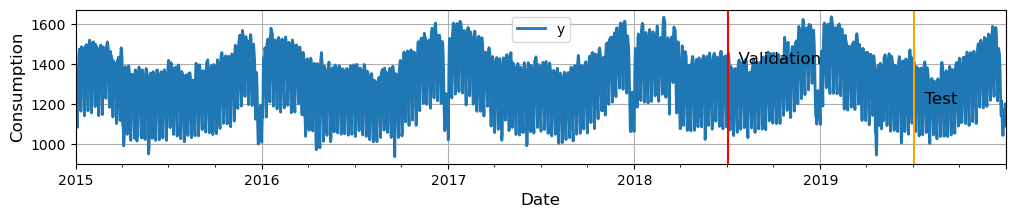

In [11]:
plot_df = pd.concat([df_train[:-val_size],df_train[-val_size:], df_test ]).set_index('ds') # Concatenate the train and forecast dataframes

plot_df[['y']].plot(linewidth=2, figsize=(12,2))
plt.axvline(df['ds'].iloc[df_train.shape[0] - val_size ], color='red')
plt.axvline(df['ds'].iloc[df_train.shape[0] ], color='orange')
plt.ylabel('Consumption', fontsize=12)
plt.xlabel('Date', fontsize=12)
plt.text(df['ds'].iloc[df_train.shape[0] - val_size ], 1400, '  Validation', fontsize=12)
plt.text(df['ds'].iloc[df_train.shape[0] ], 1200, '  Test', fontsize=12)
plt.grid()

## Обзор DL моделей

В данном примере будут рассмотрены несоклько архитектур нейронных сетей для предсказания значений временных рядов. 
Рассмотрим следующие архитектуры.


* Архитектура __[`LSTM`](https://nixtlaverse.nixtla.io/neuralforecast/models.nhits.html)__. Архитектура основывается на рекуррентных ячейках с длинной и короткой функцией "паямяти"([`LSTM`](https://arxiv.org/abs/1402.1128)).
В данном фреймворке используется архитектура типа энкодер-декодер, где энкодер состоит из нескольких `LSTM` слоев тогда как декодер состоит из полносявзных слоев. Предсказания осуществляются итерационно. 
Напомним, что струдктура одной [`LSTM`](https://www.bioinf.jku.at/publications/older/2604.pdf) предсавляет собой набор латентных связей (т.н. [gates](https://d2l.ai/chapter_recurrent-modern/lstm.html)). Среди них есть связи для продолжительных зависимостей - продолжительного контекста и связей для отслеживания краковременных изменений. Связи сохраняют и контролируют поток градиентов в длинных последовательностях. Это позволяет сети более эффективно улавливать долгосрочные зависимости и значительно повышает ее способность к обучению на последовательных данных. `LSTM` имеет три гейта (вход, забывание и выход) и отлично справляется с улавливанием долгосрочных зависимостей.
В какой то степери долговременный контекст соответствует тренду и цикличности, в то время как крактовременный контекст соответствует сезонности. В литературе представлено несколько модификций `LSTM`, структура типичной ячейки может [быть представлена](https://colah.github.io/posts/2015-08-Understanding-LSTMs/) как\
<img src="https://nixtla.github.io/neuralforecast1/imgs_models/lstm.png" width="500px">\
<img src="https://www.deeplearningwizard.com/deep_learning/practical_pytorch/images/rnn2n.png" width="500px">\                 
> Напоним что рекуррентные ячейки ([`RNN`](https://onlinelibrary.wiley.com/doiabs/10.1207/s15516709cog1)) явлются в некоторой степени реализацией нелинейного марковского проецсса. Ячейка может быть выражена в виде `state-space` выражения как
> $$  \begin{cases}
   h_{t} = \mathrm{Activation}(x_{t} W^{\intercal}_{ih} + b_{ih}  +  h_{t-1} W^{\intercal}_{hh} + b_{hh}), 
   \\
  \mathbf{y}_{[t+1]}=\mathrm{Activation}(h_{t}W^{out}_{yh} + b_{yh} ).
 \end{cases} $$
> В фреймворке `Neuralforecast` архитектура рекуррентный энкодер-полносвязный декодер представляется [следующим образом](https://nixtla.github.io/neuralforecast1/models.rnn.html):
> $$  \begin{cases}
   h_{t} = \mathrm{Activation}(x_{t} W^{\intercal}_{ih} + b_{ih}  +  h_{t-1} W^{\intercal}_{hh} + b_{hh}), 
   \\
  \mathbf{y}_{[t+1:t+H]}=\mathrm{MLP}(h_{t}).
 \end{cases} $$
> Также отметим, что в фреймворке `Neuralforecast` реализуются модифицированная `LSTM` ячейка - [`GRU`](https://nixtla.github.io/neuralforecast1/models.gru.html). В данной ячейке используется комбинация долговременного и кратковременного контекста.\
> <img src="https://nixtla.github.io/neuralforecast1/imgs_models/gru.png" width="500px">\
> Также в фреймворке может быть найдена архитектура расширенной `RNN` ячейки с использованием некоторого аналога пулинга - т.н. расширение ([`dialation`](https://arxiv.org/abs/1710.02224)). Данный прием позволяет охватить длинные контексты с наименьшим число параметров. Рост значения `dialation` можно рассматривать как низкочастотную фильтацию.\
> <img src="https://nixtla.github.io/neuralforecast1/imgs_models/dilated_rnn.png" width="500px">\
> Также одной из наболее успешных модификаций рекуррентного подхода можно назвать [`DeepAR`](https://www.sciencedirect.com/science/article/pii/S0169207019301888). Данная модель также может быть найдена в [`Neuralforecast`](https://nixtlaverse.nixtla.io/neuralforecast/models.deepar.html). Идея модели заключается в порождении вероятностного прогнозы на основе оптимизированной глубокой авторегрессионной рекуррентной нейронной сети. То есть каждое следующее значение порождается из предсказанного распределения (аналог вероятностного прогназирования). \
> <img src="https://ars.els-cdn.com/content/image/1-s2.0-S0169207019301888-gr3_lrg.jpg" width="500px">\
> Рекуррентные архитектуры имеют ряд приемуществ, такие как простота (низкая вычислительня сложность) и возможность работы с длинными контекстами.
> Однако [у рекурретных архитектур](https://encord.com/blog/time-series-predictions-with-recurrent-neural-networks/)  есть ограничения, такие как проблема исчезающего или взрывающегося градиента, которая влияет на их способность улавливать долгосрочные зависимости, поскольку РНС могут быть развернуты очень далеко назад в этом Ограничения памяти также могут ограничить их производительность при работе с очень длинными последовательностями. Хотя такие методы, как `LSTM` и `GRU`, смягчают некоторые проблемы, другие продвинутые архитектуры, такие как трансформаторы, могут превосходить RNN в некоторых сложных сценариях временных рядов, что требует тщательного выбора модели.
> * __[Проблема исчезающего градиента](https://encord.com/blog/time-series-predictions-with-recurrent-neural-networks/)__ - это проблема, которая влияет на обучение глубоких нейронных сетей, включая рекуррентные нейронные сети (РНС). Она возникает, когда градиенты, указывающие направление и величину обновлений весов сети в процессе обучения, становятся очень маленькими по мере распространения в обратном направлении по слоям. Это явление препятствует способности РНС к изучению дальних зависимостей и может привести к медленному или неэффективному обучению. \
> __Проблема исчезающего градиента__ особенно проблематична в последовательностях, где информация должна запоминаться или распространяться в течение длительного времени, что влияет на способность сети улавливать важные закономерности. Для борьбы с проблемой исчезающего градиента, препятствующей эффективному обучению нейронных сетей, было разработано несколько стратегий. Такие методы, как правильная инициализация веса, нормализация партии, обрезание градиента, пропуск соединений и планирование скорости обучения, играют ключевую роль в стабилизации градиентного потока и предотвращении его безвременной гибели.

<!-- >Архитектура DeepAR получает распределение прогнозов с помощью выборки по методу Монте-Карло с использованием марковской цепи на панельных данных с использованием перекрестного обучения. При этом условная вероятность задается как: $$ -->


* Архитектура __[`NBEATS`](https://arxiv.org/abs/1905.10437)__ ([Neural Basis Expansion Analysis](https://nixtlaverse.nixtla.io/neuralforecast/models.nbeats.html)) представляет собой глубокую нейронную архитектуру на основе `MLP` с обратными и прямыми остаточными связями. Архитектура `NBEATS`   [одна из наиболее успешных](https://forecastegy.com/posts/multiple-time-series-forecasting-nbeats-python/) остается одной из наболее успешных не реккуррентных архитектур для предсказания ВР [на среднем горзионте предсказаний](https://www.researchgate.net/publication/351512864_N-BEATS_neural_network_for_mid-term_electricity_load_forecasting). По существу архитектура представляет собой набор блоков, каждый из которых имеет два выхода: предсказание в перед и предсказание назад.\
<img src="https://www.researchgate.net/profile/Boris-Oreshkin/publication/351512864/figure/fig1/AS:1023454975365121@1621022089657/N-BEATS-block-diagram_W640.jpg" width="500px">\
Прямое предсказание очевидно предсказывает будущее значения, тогда как обратное предсказание выступает ограничителем порстранства предсказаний.
Модель предсказывает $h$ значений для входного окна (ретроспектива <tt>Lookback Period</tt>) размером $n\cdot h$, где $n, h$ - гиперпараметры.  Слои `NBEATS` соеденены т.н. принципом <tt>Doubly Residual Stacking Of Blocks</tt>. Где входной велчиной для каждого следующего блока является разность предсказаных значений предыдущего блока и его входных значений. Таким образом создается аналог бустинга. Последний блок называется <tt>Stack Backcast output</tt>. Выходное предсказание формируется как сумма результатов для каждого из блока<tt> Stack Forecast Output</tt>.\
<img src=https://www.researchgate.net/profile/Boris-Oreshkin/publication/351512864/figure/fig1/AS:1023454975365121@1621022089657/N-BEATS-block-diagram_W640.jpg" width="200px"> \
Отметим, что архитектура [`NBEATS`](https://arxiv.org/abs/1905.10437) имеет два варианта:
    * (1) в [интерпретируемой конфигурации](https://www.kaggle.com/code/gatandubuc/forecast-with-n-beats-interpretable-model)
    *  `NBEATS` последовательно проецирует сигнал на полиномы и гармонический базис для изучения компонентов тренда и сезонности;
    * (2) в общей конфигурации она заменяет полиномиальный и гармонический базис на базис идентичности и увеличивает глубину сети.
    * Анализ расширения нейронного базиса с учетом экзогенных факторов ([`NBEATSx`](https://arxiv.org/abs/2104.05522)) включает в себя проекции на экзогенные временные переменные, доступные на момент прогнозирования.\
[Интерпретируемая архитектура](https://nixtlaverse.nixtla.io/neuralforecast/models.nbeats.html) рекомендуется для работы с ограниченными данными, поскольку она упорядочивает  прогнозы с помощью проекций на гармоническую и трендовую базы, что хорошо подходит для большинства задач прогнозирования.\
Для получения [тренда и сезонности](https://arxiv.org/pdf/1905.10437) в интерпретируемой архитектуре авторы предлагают замену последнего слоя на полиномиальную аппроксимацию (тренд) и разложение в ряд Фурье ($sin$ и $cos$ соответственно). [Примеры nen](https://github.com/philipperemy/n-beats/blob/master/nbeats_pytorch/model.py) того как это выглядит показаны ниже.
|<img src="https://miro.medium.com/v2/resize:fit:1286/format:webp/1*Jznia_xjulaUbpNLATh_wg.png" width="300px">|<img src="https://miro.medium.com/v2/resize:fit:1286/format:webp/1*ERhjDwMuDkhktYisCsFoQQ.png" width="300px"> |<img src="https://miro.medium.com/v2/resize:fit:1286/format:webp/1*pqJxiTLGVSf_OZqTrHYT1A.png" width="300px">|
|---|---|---|
|полный блок `N-BEATS`|блок тренда `N-BEATS` |блок периода `N-BEATS`|   

<!-- https://nixtla.github.io/neuralforecast/imgs_models/nbeats.png -->

* Архитектура __[`NHITS`](https://arxiv.org/abs/2201.12886)__ - Нейронная иерархической интерполяции временных рядов ([Neural Hierarchical Interpolation for Time Series, NHITS](https://nixtlaverse.nixtla.io/neuralforecast/models.nhits.html)) является расширением идеи [`NBEATS`](https://arxiv.org/abs/1905.10437) для предсказаний на длинные горизонты. Указывается, что при прогнозе на длинные горизонты оснвные две проблемы это волатильность и вычислительная сложность. Модель [`NHITS`](https://github.com/cchallu/n-hits) решает эти проблемы путем  много-масштабного семплинга входа и выхода и иерархической интерполяции. Семплинг [реализуется](https://unit8co.github.io/darts/generated_api/darts.models.forecasting.nhits.html) за счет операции `MaxPooling`. Указанные операции позволяют методу [`NHITS`](https://github.com/cchallu/n-hits) собирать свои прогнозы последовательно, выборочно выделяя компоненты с различными частотами и масштабами при декомпозиции входного сигнала и при синтезе прогноза. Ожидается что семплинг будет некоторым аналогом разложения ВР на компоненты. Таким образом в отличии от [`NBEATS`](https://arxiv.org/abs/1905.10437) принцип бустинга заменяется на принцип декомпозиции на некоторый аналог эмпирических мод. Однако, для восстоновления исходной размерности после обработки семплированных мод используется интерполяция. Интерполяция может быть как линейной, так и кубической. <img src="https://github.com/cchallu/n-hits/raw/main/images/nhits-arch.png" width="500px">
> Отметим, что [подобно](https://unit8co.github.io/darts/generated_api/darts.models.forecasting.nhits.html) `NBEATS`, в дополнение к одномерной версии, представленной в статье, эта реализация также поддерживает многомерные ряды (и ковариаты), предсавляя входные данные модели до одномерного ряда и преобразуя выходные данные в тензор соответствующих размеров. Кроме того, модель также поддерживает создание вероятностных прогнозов (путем указания параметра правдоподобия).
> [Особенностью архитектуры](https://www.datasciencewithmarco.com/blog/all-about-n-hits-the-latest-breakthrough-in-time-series-forecasting) является использование передискретизации (макс-пулинга) как метода выделения все более низко-частотных компонент. <img src="https://cdn-images-1.medium.com/max/800/1*_1Q15mryT59_WEWuhghATw.png" width="500px">

<img src="https://ai2-s2-public.s3.amazonaws.com/figures/2017-08-08/3667179eca208e4b609089c5dc25387294272007/2-Figure1-1.png" width="500px">
https://www.catalyzex.com/paper/arxiv:2210.02186

* Трансформер __([Vanilla Transformer](https://arxiv.org/pdf/2012.07436))__ представляет собой сочитание [нескольких интуиций](https://huggingface.co/blog/time-series-transformers) в отношении [временных рядов](https://nixtlaverse.nixtla.io/neuralforecast/models.vanillatransformer.html). \
 \* Начнем с того, что использование архитектуры кодировщик-декодировщик (`encoder`-`decoder`) интуитивно позволяет генерировать последовательности предсказаний (с заданным горизонтом) в подход `sequence2sequence`. При этом мы можем, задав некоторый тип распределения, породить выборку из него, чтобы получить прогнозы до желаемого горизонта предсказания. Это известно как жадная выборка/поиск предсказаний, \
 \* Во-вторых, архитеткуры типа трансформатор помогает обучаться на продолжительных  временных рядах, которые могут содержать тысячи временных точек и соразмерные горизонты прогнозирования. Ввод в модель всей истории временного ряда за один раз может быть нецелесообразен из-за ограничений по времени и памяти механизма внимания.\
      <tt> Отметим, что таким образом, можно рассмотреть некоторое подходящее контекстное окно и выбрать это окно и последующее окно с размером длины предсказания из обучающих данных при формироании батчей для стохастического градиентного спуска (`SGD`). При этом окно с размером контекста может быть передано кодировщику, а окно предсказания - декодеру с каузальной маской. __Казуальная маска__ означает, что декодер может просматривать только предыдущие временные шаги при обучении следующему значению.</tt>\
 \* Еще одно преимущество архитектур `Transformer` по сравнению с другими архитектурами заключается в том, что мы можем включать отсутствующие значения (пропуски, несинхронность встречаются во временных рядах) в качестве дополнительной маски для кодера или декодера и продолжать обучение, не прибегая к их заполнению или фильтрации. Такая маска будет называться `attention_mask`.  Кроме того, поскольку `Transformer` может перестраиваться или узнавать ложные корреляции гораздо легче, чем другие методы.\
 \* При этом недостатком оригинальной (`Vanilla`) архитектуры `Transformer` является ограничение размеров контекстного окна и окна предсказания из-за квадратичных требований к вычислениям и памяти.\
 <img src="https://www.researchgate.net/publication/373287556/figure/fig1/AS:11431281211958098@1702516201905/The-informer-model-for-time-series-prediction_W640.jpg" width="500px">


>* [Отметим](https://arxiv.org/pdf/2012.07436), что в случае многомерных отображений ВР учет полной размерности данных  может оказаться вычислительно сложным, поэтому  прибегают к некоторой аппроксимации распределения, проще всего моделируя каждую компоненту как независимое распределение из того же семейства, или некоторую низкоранговую аппроксимацию и т.д.\
В первую очередь вычислительная сложность обсуловлена операциями внимания. Этот слой требует $O(T^2)$ операций, где $T$ - размер окна ВР. Эта проблема особенно актуальна при длинных горизонтах прогнозирования `Long sequence time-series forecasting` __`(LSTF problem)`__. Одно из решений этой проблемы известно как `ProbSparse` идея этого метода в использовании эффекта __разряженности моделей__. В архитектуре __[`informer`](https://arxiv.org/pdf/2012.07436)__ для снижения чила операций до $O(T \cdot log T)$. \
Vanilla self attention vs `ProbSparse` attention  иллюстрация из работы [Autoformer paper](https://wuhaixu2016.github.io/pdf/NeurIPS2021_Autoformer.pdf)\
<img src="https://huggingface.co/datasets/huggingface/documentation-images/resolve/main/blog/informer/informer_full_vs_sparse_attention.png" width="700px">\
Таким образом общая архитектура  [`informer`](https://github.com/zhouhaoyi/Informer2020) будет [иметь вид](https://www.mdpi.com/2073-8994/15/4/951)
<img src="https://www.mdpi.com/symmetry/symmetry-15-00951/article_deploy/html/images/symmetry-15-00951-g001.png" width="500px">\
В дополнение к `ProbSparse` архитектура [`informer`](https://huggingface.co/docs/transformers/en/model_doc/informer) может использоваться дистиляция слоя `attention`. Этим число параметров энкодера урезается в 2 раза. Также в данной архитектуре используется генеративное предсказание выходной последовательности целиком. Это упрощает и ускоряет процесс работы модели.

>* Также одна из интересных последних архитектур __[`autoformer`](https://arxiv.org/pdf/2106.13008)__ представляет идею того, что помимо боков трансформеров следует проводить разложение моделйе ВР на стандартные компоненты (тренд, сезонность, остаток) при помощи `Decomposition Layer`. Данная модель также предлагает альтернативу архитектуре слоя внимания - `auto-correlation mechanism`.  Этот подход по меньшей мере снижает вычислительную сложность по сравнению с вниманием до нескольких $T \log{T}$ [(если операция реализуется через быстрое преобразование Фурье)](https://huggingface.co/blog/autoformer). По существу модель возвращает архитектурные решения, разработанные для текстов в архитектурах-трансформерах к их более нативному (интерпретируемому) виду для архитектур моделей временных рядов.\
<img src="https://huggingface.co/datasets/huggingface/documentation-images/resolve/main/blog/148_autoformer/autoformer_architecture.png" width="500px">\
Ааналогичные решения с декомпозицией были применены в архитектурах [`DLinear`](https://arxiv.org/pdf/2205.13504) и [`FEDformer`](https://arxiv.org/pdf/2201.12740).

* Модель __Temporal Fusion Transformer [`TFT`](https://arxiv.org/abs/1912.09363)__ представляет собой [гибридную архитектуру](https://github.com/google-research/google-research/tree/master/tft), объединяющую `LSTM`-кодирование временных рядов и интерпретируемость слоев внимания трансформатора. Прогнозирование базируется как на основном  ВР (авторегрессионная переменная), так и для ковариатов к ним. В данной архитектуре можно провести разделение ковариатов на статические (постоянные для временного ряда), будущие ковариаты (known, известные заранее для всей истории и будущего) и истонические (наблюдаемые, известные только для исторических данных). Также для архитектуры важно являются ли входные переменные категориальными и непрерывными.\
Переменные встраиваются в высокоразмерное пространство путем обучения вектора встраивания. Встраивания категориальных переменных изучаются в классическом смысле встраивания дискретных значений. Для каждой непрерывной переменной модель обучается одному вектору, который затем масштабируется для дальнейшей обработки. \
Следующим шагом является фильтрация переменных с помощью сети выбора переменных (`Variable Selection Network`, `VSN`). Эта сеть присваивает веса входам в соответствии с их значимостью для предсказания.  Статические переменные используются в качестве контекста для выбора других переменных и в качестве начального состояния `LSTM`-кодировщиков. \
После кодирования переменные передаются в многоголовые слои внимания (декодер), которые формируют окончательное предсказание. Вся архитектура переплетена остаточными связями с механизмами стробирования, которые позволяют архитектуре адаптироваться к различным задачам, пропуская некоторые ее части. \
Блоки архитектуры сопровждаются ячейкми блокировки (Gated residual network, GRN), которые позволяют архитектуре адаптироваться к различным проблемам, пропуская некоторые ее части. \
[Таким образом](https://nixtlaverse.nixtla.io/neuralforecast/models.tft.html) `TFT` сочетает в себе слои стробирования, рекуррентный энкодер `LSTM` и многоголовые слои внимания для декодера с многоступенчатой стратегией прогнозирования. Модель позволяет предсказывать доверительные интервалы для нескольких будущих значений временных рядов. 
<img src="https://github.com/NVIDIA/DeepLearningExamples/raw/master/PyTorch/Forecasting/TFT/TFT_architecture.PNG" width="700px">
<img src="https://developer-blogs.nvidia.com/wp-content/uploads/2022/02/Time-Series-Forecast_Pic-3-768x533.png" width="500px">
>Отметим, что в данной реализации отличие от эталонной в том, что решает проблему недостающих данных, которая часто встречается в производственных наборах данных, либо маскируя их значения в матрицах внимания, либо встраивая их как особое значение в латентное пространство.\
>В целях объяснимости, главы слоев самовнимания имеют общие матрицы значений. Это позволяет интерпретировать самовнимание как ансамбль моделей, предсказывающих различные временные паттерны по одному и тому же набору признаков.\
> Другая характеристика, помогающая понять модель, - активация VSN, которая говорит нам, насколько релевантна данный признак для предсказания.\
>Также отметим, что в общем смысле могут быть и другие модификации архитектур внимания. вот некоторое их [summary](https://seunghan96.github.io/ts/ts56/):
><img src="https://seunghan96.github.io/assets/img/ts/img305.png" width="500px">

* Некоторой модификацией идей внимания, трансформеров и других подходов является ахритектура [`DLinear`](https://arxiv.org/pdf/2205.13504). Авторы ставят вопрос о необходимости использования трансформеров для прямого предсказания для длинном горизонте. Предполагается что эту идеию можно заменить любой нелинейной операцией. Наиболее интерпретируемая из таких операций с точки зрения авторов - это разложение временного ряда на тренд (плюс цикличность) и сезонность и их независимая фильтрация. Идея блока архитектуры может быть проиллюстрирована [следующим образом](https://github.com/vivva/DLinear?tab=readme-ov-file):
<img src="https://github.com/vivva/DLinear/raw/main/pics/DLinear.png" width="800px">
>В качестве мотивайии авторы работы [указывают следующую](https://arxiv.org/pdf/2205.13504). "Основная идея трансформера заключается в многоголовый механизме самовнимания, который обладает способностью извлекать семантические корреляции между элементами в длинной последовательности (например, слов в текстах или двухмерных локациях на изображениях). Однако самовнимание в определенной степени инвариантно к перестановкам и «антипорядку». Хотя использование различных методов позиционного кодирования позволяет сохранить некоторую информацию об упорядочивании, все же неизбежны временные потери информации после применения самовнимания поверх них. Обычно это не является серьезной проблемой для семантически насыщенных приложений, таких как NLP.  Например, семантический смысл предложения в значительной степени сохраняется, даже если мы переставляем некоторые
слова в нем. Однако при анализе данных временных рядов семантика в числовых данных обычно отсутствует и нас в основном интересует моделирование временных изменений среди непрерывного набора точек. То есть порядок значений играет наиболее важную роль. Следовательно, мы
ставится следующий интригующий вопрос: Действительно ли трансформеры эффективны для долгосрочного прогнозирования временных рядов? Более того, хотя существующие решения проблем долгосрочного прогноза (LTSF) на основе трансформера демонстрируют значительное повышение точности прогнозирования по сравнению с традиционными методами, в экспериментах все сравниваемые (не трансформеры) базовые модели используют авторегрессионный или итерационный многошаговый (IMS) прогноз, который, как известно, страдает от значительного эффекта накопления ошибок для задачи LTSF.


 

>Отметим, что в целом могут быть и дополнительные блоки, позволяющие оптимизировать архитектуры. Например использование [нормализации Временных рядов](https://openreview.net/pdf?id=cGDAkQo1C0p).

## Знакомство с объектом `NeuralForecast`

Загрузим несколько тестовых моделей. В том числе рекурретную архитектуру `encoder-decoder` и архитектуру `NHITS`. Для Архитектур будут указаны общие параметры:
* `h` - горизонт предсказания;
* `max_steps` - число эпох обучения;
* `default_root_dir` - путь для сохранения промежуточных результатов.

Корме того архитектура [`LSTM`](https://nixtlaverse.nixtla.io/neuralforecast/models.lstm.html), имеющая `LSTM` `encoder`, и  `MLP` `decoder`.  которая  задана своими:
* `encoder_hidden_size` - число параметров слоев энкодера (по умолчанию 2 слоя)
* `decoder_hidden_size` - число параметров слоев декодера (по умолчанию 2 слоя)

Архитектура [`NHITS`](https://nixtlaverse.nixtla.io/neuralforecast/models.nhits.html)

In [ ]:
# import logging
# import pytorch_lightning as pl
# pl.utilities.distributed.log.setLevel(logging.ERROR)

In [13]:
from neuralforecast import NeuralForecast
from neuralforecast.models import LSTM, NHITS, DLinear, Informer  


Обратите внимание на особенность отображения пути! `log_path = "D:/"`

In [16]:
horizon = test_size
log_path = "D:/"

models = [
        LSTM(h=horizon,                    # Forecast horizon 
               max_steps=10,                # Number of steps to train
               scaler_type='standard',       # Type of scaler to normalize data
               encoder_hidden_size=128,       # Defines the size of the hidden state of the LSTM
               decoder_hidden_size=128,       # Defines the number of hidden units of each layer of the MLP decoder  
               default_root_dir=log_path),       
        NHITS(h=horizon,                   # Forecast horizon
                input_size= horizon,      # Length of input sequence
                max_steps=10,               # Number of steps to train
                n_freq_downsample=[1, 1, 1],  # Downsampling factors for each stack output
                default_root_dir=log_path),
        DLinear(h=horizon,                 # Forecasting horizon
                input_size=2*horizon,           # Input size
                max_steps=10,               # Number of training iterations
                moving_avg_window = 2*(horizon//2) + 1,
                val_check_steps=10,          # Compute validation loss every 100 steps
                default_root_dir=log_path), # Stop training if validation loss does not improve
          
          ]

C:\Users\Ronkin\anaconda3_1\Lib\site-packages\neuralforecast\common\_base_model.py:138: UserWarning: Input size too small. Automatically setting input size to 3 * horizon = 546
  warnings.warn(
Seed set to 1
Seed set to 1
Seed set to 1


Запустим модель на обучение

In [17]:
nf = NeuralForecast(models=models, freq=FREQ)
nf.fit(df=df_train, val_size = val_size)

C:\Users\Ronkin\anaconda3_1\Lib\site-packages\neuralforecast\common\_base_model.py:535: UserWarning: val_check_steps is greater than max_steps, setting val_check_steps to max_steps.
  warnings.warn(
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs

  | Name         | Type          | Params | Mode 
-------------------------------------------------------
0 | loss         | MAE           | 0      | train
1 | padder_train | ConstantPad1d | 0      | train
2 | scaler       | TemporalNorm  | 0      | train
3 | hist_encoder | LSTM          | 199 K  | train
4 | mlp_decoder  | MLP           | 16.6 K | train
-------------------------------------------------------
215 K     Trainable params
0         Non-trainable params
215 K     Total params
0.863     Total estimated model params size (MB)
10        Modules in train mode
0         Modules in eval mode


Sanity Checking: |                                                                               | 0/? [00:00<…

Training: |                                                                                      | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

`Trainer.fit` stopped: `max_steps=10` reached.
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs

  | Name         | Type          | Params | Mode 
-------------------------------------------------------
0 | loss         | MAE           | 0      | train
1 | padder_train | ConstantPad1d | 0      | train
2 | scaler       | TemporalNorm  | 0      | train
3 | blocks       | ModuleList    | 3.1 M  | train
-------------------------------------------------------
3.1 M     Trainable params
0         Non-trainable params
3.1 M     Total params
12.448    Total estimated model params size (MB)
34        Modules in train mode
0         Modules in eval mode


Sanity Checking: |                                                                               | 0/? [00:00<…

Training: |                                                                                      | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

`Trainer.fit` stopped: `max_steps=10` reached.
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs

  | Name          | Type          | Params | Mode 
--------------------------------------------------------
0 | loss          | MAE           | 0      | train
1 | padder_train  | ConstantPad1d | 0      | train
2 | scaler        | TemporalNorm  | 0      | train
3 | decomp        | SeriesDecomp  | 0      | train
4 | linear_trend  | Linear        | 66.4 K | train
5 | linear_season | Linear        | 66.4 K | train
--------------------------------------------------------
132 K     Trainable params
0         Non-trainable params
132 K     Total params
0.531     Total estimated model params size (MB)
8         Modules in train mode
0         Modules in eval mode


Sanity Checking: |                                                                               | 0/? [00:00<…

Training: |                                                                                      | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

`Trainer.fit` stopped: `max_steps=10` reached.


In [18]:
y_hat = nf.predict(futr_df=df_test)

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs


Predicting: |                                                                                    | 0/? [00:00<…

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs


Predicting: |                                                                                    | 0/? [00:00<…

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs


Predicting: |                                                                                    | 0/? [00:00<…

In [19]:
plot_df_test = y_hat.copy(deep=False).reset_index()
plot_df_test['y'] = df_test['y'].values
plot_df_test.index = plot_df_test['ds']
plot_df_test.to_csv('predicts.csv')

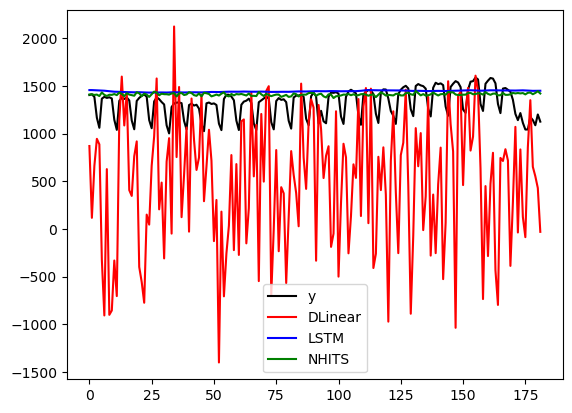

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
plot_df_test = pd.read_csv('predicts.csv')
p_ = plot_df_test['y'].astype(float); plt.plot(p_, c='k', label='y')
p_ = plot_df_test['DLinear'].astype(float); plt.plot(p_, c='r', label='DLinear')
p_ = plot_df_test['LSTM'].astype(float); plt.plot(p_, c='b', label='LSTM')
p_ = plot_df_test['NHITS'].astype(float); plt.plot(p_, c='g', label='NHITS')

plt.legend()
# plt.plot(plot_df_test['y'].values)

Вероятностное прогнозирование является естественным ответом на вопрос о количественной оценке неопределенности будущего целевой переменной. Задача требует моделирования следующего условного прогнозного распределения: 
$$\mathbb{P}(\mathbf{y}_{t+1:t+H} \;|\; \mathbf{y}_{:t})$$
Для этого используем ` multi quantile loss function (MQLoss)`
$$ \mathrm{MQLoss}(y_{\tau}, [\hat{y}^{(q1)}_{\tau},\hat{y}^{(q2)}_{\tau},\dots,\hat{y}^{(Q)}_{\tau}]) = \frac{1}{H} \sum_{q} \mathrm{QL}(y_{\tau}, \hat{y}^{(q)}_{\tau}) $$

In [21]:
from neuralforecast.losses.pytorch import MQLoss


In [22]:
horizon = test_size
levels = [80, 90]
loss=MQLoss(level=levels)

In [23]:
models = [ LSTM(h=horizon,                    # Forecast horizon 
               max_steps=10,                # Number of steps to train
               scaler_type='standard',       # Type of scaler to normalize data
               encoder_hidden_size=128,       # Defines the size of the hidden state of the LSTM
               decoder_hidden_size=128,       # Defines the number of hidden units of each layer of the MLP decoder 
               loss=loss, 
               default_root_dir=log_path),      
          NHITS(h=horizon,                   # Forecast horizon
                input_size= horizon,      # Length of input sequence
                max_steps=10,               # Number of steps to train
                loss=loss,
                n_freq_downsample=[1, 1, 1],  # Downsampling factors for each stack output
                default_root_dir=log_path) ,
           DLinear(h=horizon,                 # Forecasting horizon
                input_size=2*horizon,           # Input size
                max_steps=10,               # Number of training iterations
                moving_avg_window = 2*(horizon//2) + 1,
                val_check_steps=10,          # Compute validation loss every 100 steps
                loss=loss,   
                default_root_dir=log_path), # Stop training if validation loss does not improve
          ]

C:\Users\Ronkin\anaconda3_1\Lib\site-packages\neuralforecast\common\_base_model.py:138: UserWarning: Input size too small. Automatically setting input size to 3 * horizon = 546
  warnings.warn(
Seed set to 1
Seed set to 1
Seed set to 1


In [24]:
nf = NeuralForecast(models=models, freq=FREQ)
nf.fit(df=df_train, val_size = val_size)

C:\Users\Ronkin\anaconda3_1\Lib\site-packages\neuralforecast\common\_base_model.py:535: UserWarning: val_check_steps is greater than max_steps, setting val_check_steps to max_steps.
  warnings.warn(
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs

  | Name         | Type          | Params | Mode 
-------------------------------------------------------
0 | loss         | MQLoss        | 5      | train
1 | padder_train | ConstantPad1d | 0      | train
2 | scaler       | TemporalNorm  | 0      | train
3 | hist_encoder | LSTM          | 199 K  | train
4 | mlp_decoder  | MLP           | 17.2 K | train
-------------------------------------------------------
216 K     Trainable params
5         Non-trainable params
216 K     Total params
0.865     Total estimated model params size (MB)
10        Modules in train mode
0         Modules in eval mode


Sanity Checking: |                                                                               | 0/? [00:00<…

Training: |                                                                                      | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

`Trainer.fit` stopped: `max_steps=10` reached.
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs

  | Name         | Type          | Params | Mode 
-------------------------------------------------------
0 | loss         | MQLoss        | 5      | train
1 | padder_train | ConstantPad1d | 0      | train
2 | scaler       | TemporalNorm  | 0      | train
3 | blocks       | ModuleList    | 4.2 M  | train
-------------------------------------------------------
4.2 M     Trainable params
5         Non-trainable params
4.2 M     Total params
16.930    Total estimated model params size (MB)
34        Modules in train mode
0         Modules in eval mode


Sanity Checking: |                                                                               | 0/? [00:00<…

Training: |                                                                                      | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

`Trainer.fit` stopped: `max_steps=10` reached.
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs

  | Name          | Type          | Params | Mode 
--------------------------------------------------------
0 | loss          | MQLoss        | 5      | train
1 | padder_train  | ConstantPad1d | 0      | train
2 | scaler        | TemporalNorm  | 0      | train
3 | decomp        | SeriesDecomp  | 0      | train
4 | linear_trend  | Linear        | 332 K  | train
5 | linear_season | Linear        | 332 K  | train
--------------------------------------------------------
664 K     Trainable params
5         Non-trainable params
664 K     Total params
2.657     Total estimated model params size (MB)
8         Modules in train mode
0         Modules in eval mode


Sanity Checking: |                                                                               | 0/? [00:00<…

Training: |                                                                                      | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

`Trainer.fit` stopped: `max_steps=10` reached.


In [25]:
y_hat = nf.predict(futr_df=df_test)
plot_df_test = y_hat.copy(deep=False).reset_index()
plot_df_test['y'] = df_test['y'].values
plot_df_test.index = plot_df_test['ds']
plot_df_test.to_csv('predicts.csv')

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs


Predicting: |                                                                                    | 0/? [00:00<…

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs


Predicting: |                                                                                    | 0/? [00:00<…

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs


Predicting: |                                                                                    | 0/? [00:00<…

In [26]:
plot_df_test.head(1)

,index,unique_id,ds,LSTM-median,LSTM-lo-90,LSTM-lo-80,LSTM-hi-80,LSTM-hi-90,NHITS-median,NHITS-lo-90,NHITS-lo-80,NHITS-hi-80,NHITS-hi-90,DLinear-median,DLinear-lo-90,DLinear-lo-80,DLinear-hi-80,DLinear-hi-90,y
ds,,,,,,,,,,,,,,,,,,,
2019-07-03,0,Consumption,2019-07-03,1410.182617,1328.0,1317.762573,1436.62085,1440.241577,1379.85437,1212.19519,1298.540894,1560.271851,1692.203613,872.604614,244.495331,532.102417,919.32605,1008.867249,1404.258


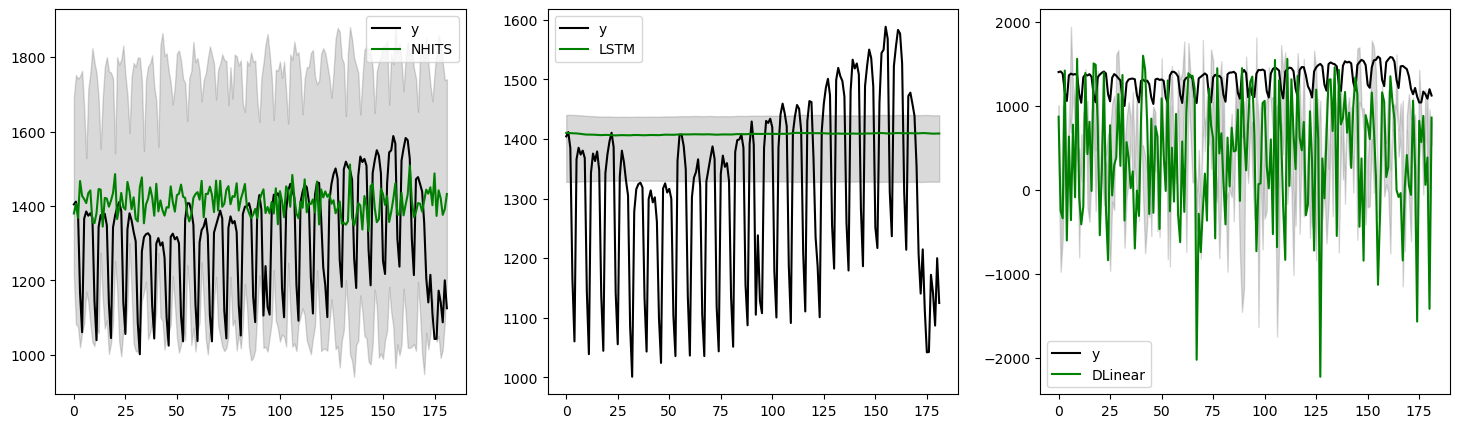

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
plot_df_test = pd.read_csv('predicts.csv')


fig, ax = plt.subplots(1,3, figsize=(18,5))

p_ = plot_df_test['y'].astype(float); ax[0].plot(p_, c='k', label='y')
p_ = plot_df_test['NHITS-median'].astype(float); ax[0].plot(p_, c='g', label='NHITS')
p_lo = plot_df_test['NHITS-lo-90'].astype(float); 
p_hi = plot_df_test['NHITS-hi-90'].astype(float); 
ax[0].fill_between(p_.index, p_lo, p_hi, color='k', alpha=0.15)
ax[0].legend()

p_ = plot_df_test['y'].astype(float); ax[1].plot(p_, c='k', label='y')
p_ = plot_df_test['LSTM-median'].astype(float); ax[1].plot(p_, c='g', label='LSTM')
p_lo = plot_df_test['LSTM-lo-90'].astype(float); 
p_hi = plot_df_test['LSTM-hi-90'].astype(float); 
ax[1].fill_between(p_.index, p_lo, p_hi, color='k', alpha=0.15)
ax[1].legend()


p_ = plot_df_test['y'].astype(float); ax[2].plot(p_, c='k', label='y')
p_ = plot_df_test['DLinear-median'].astype(float); ax[2].plot(p_, c='g', label='DLinear')
p_lo = plot_df_test['DLinear-lo-90'].astype(float); 
p_hi = plot_df_test['DLinear-hi-90'].astype(float); 
ax[2].fill_between(p_.index, p_lo, p_hi, color='k', alpha=0.15)
ax[2].legend()

plt.show()

Попробуем также провести кросс-валидация модели (то есть ранее изученную процедуру `back testing`).

In [28]:
cv_df = nf.cross_validation(df_train, n_windows=3)

C:\Users\Ronkin\anaconda3_1\Lib\site-packages\neuralforecast\common\_base_model.py:535: UserWarning: val_check_steps is greater than max_steps, setting val_check_steps to max_steps.
  warnings.warn(
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs

  | Name         | Type          | Params | Mode 
-------------------------------------------------------
0 | loss         | MQLoss        | 5      | train
1 | padder_train | ConstantPad1d | 0      | train
2 | scaler       | TemporalNorm  | 0      | train
3 | hist_encoder | LSTM          | 199 K  | train
4 | mlp_decoder  | MLP           | 17.2 K | train
-------------------------------------------------------
216 K     Trainable params
5         Non-trainable params
216 K     Total params
0.865     Total estimated model params size (MB)
10        Modules in train mode
0         Modules in eval mode


Sanity Checking: |                                                                               | 0/? [00:00<…

Training: |                                                                                      | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

`Trainer.fit` stopped: `max_steps=10` reached.
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs


Predicting: |                                                                                    | 0/? [00:00<…

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs

  | Name         | Type          | Params | Mode 
-------------------------------------------------------
0 | loss         | MQLoss        | 5      | train
1 | padder_train | ConstantPad1d | 0      | train
2 | scaler       | TemporalNorm  | 0      | train
3 | blocks       | ModuleList    | 4.2 M  | train
-------------------------------------------------------
4.2 M     Trainable params
5         Non-trainable params
4.2 M     Total params
16.930    Total estimated model params size (MB)
34        Modules in train mode
0         Modules in eval mode


Sanity Checking: |                                                                               | 0/? [00:00<…

Training: |                                                                                      | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

`Trainer.fit` stopped: `max_steps=10` reached.
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs


Predicting: |                                                                                    | 0/? [00:00<…

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs

  | Name          | Type          | Params | Mode 
--------------------------------------------------------
0 | loss          | MQLoss        | 5      | train
1 | padder_train  | ConstantPad1d | 0      | train
2 | scaler        | TemporalNorm  | 0      | train
3 | decomp        | SeriesDecomp  | 0      | train
4 | linear_trend  | Linear        | 332 K  | train
5 | linear_season | Linear        | 332 K  | train
--------------------------------------------------------
664 K     Trainable params
5         Non-trainable params
664 K     Total params
2.657     Total estimated model params size (MB)
8         Modules in train mode
0         Modules in eval mode


Sanity Checking: |                                                                               | 0/? [00:00<…

Training: |                                                                                      | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

`Trainer.fit` stopped: `max_steps=10` reached.
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs


Predicting: |                                                                                    | 0/? [00:00<…

In [29]:
cv_df.columns = cv_df.columns.str.replace('-median', '')
cv_df['unique_id'] = cv_df.index
cv_df.index = pd.Index(np.arange(cv_df.shape[0]))
cv_df.head(2)

,unique_id,ds,cutoff,LSTM,LSTM-lo-90,LSTM-lo-80,LSTM-hi-80,LSTM-hi-90,NHITS,NHITS-lo-90,NHITS-lo-80,NHITS-hi-80,NHITS-hi-90,DLinear,DLinear-lo-90,DLinear-lo-80,DLinear-hi-80,DLinear-hi-90,y
0,0,2018-12-31,2018-12-30,1346.339478,1062.372803,1101.619019,1588.364136,1632.307617,1036.642822,860.852112,918.926819,1269.153931,1525.781982,1384.508667,576.133484,974.891602,1455.296143,1358.216309,1148.098
1,1,2019-01-01,2018-12-30,1346.401978,1062.574341,1101.847168,1588.199829,1632.179932,1046.767578,754.542786,798.285095,1409.449829,1444.468384,91.926849,-165.630707,871.899780,-370.828918,-379.704193,1096.818


Проведем оценку точности полученной модели по результатам кросс-валидации.

Функция `evaluate` принимает следующие аргументы:
- `df`: Фрейм данных с прогнозами для оценки.
- `metrics` (`list`): Показатели для вычисления.
- `models` (`list`): Названия моделей для оценки. По умолчанию используется значение `None`, при котором используются все столбцы после удаления `id_col`, `time_col` и `target_col`.
- `id_col` (`str`): столбец, который определяет уникальные идентификаторы ВР. По умолчанию используется `unique_id`.
- `time_col` (`str`): Столбец с временными метками или временным индексом. По умолчанию используется `ds`.
- `target_col` (`str`): столбец с целевой переменной. Значение по умолчанию - `y`.

Обратите внимание, что если мы используем значение `models` по умолчанию, то нам нужно исключить столбец `cutoff` из фрейма данных перекрестной проверки.

К процедуре проверки добавим также рекомендацию лучей модели в качестве некоторого упражнения.

In [ ]:
from utilsforecast.evaluation import evaluate
from utilsforecast.losses import mae, rmse


In [ ]:
evaluation_df['best_model'] = evaluation_df.drop(columns=['metric', 'unique_id']).idxmin(axis=1)
evaluation_df

Визулизируем результат предсказаний.

In [ ]:
from utilsforecast.plotting import plot_series
cv_df.rename(columns = {'y' : 'actual'}, inplace = True) # rename actual values

fig = plot_series(df_train, cv_df.loc[:, cv_df.columns != 'cutoff'], max_insample_length=300, )
fig.set_size_inches(18, 6, forward=True)
fig

In [ ]:
horizon = test_size//4
levels = [90]
loss=MQLoss(level=levels)


models = [ LSTM(h=horizon,                    # Forecast horizon 
               max_steps=100,                # Number of steps to train
               input_size =  2*horizon,
               scaler_type='standard',       # Type of scaler to normalize data
               encoder_hidden_size=128,       # Defines the size of the hidden state of the LSTM
               decoder_hidden_size=128,       # Defines the number of hidden units of each layer of the MLP decoder 
               loss=loss, 
               default_root_dir=log_path),      
          NHITS(h=horizon,                   # Forecast horizon
                input_size= horizon,      # Length of input sequence
                max_steps=100,               # Number of steps to train
                loss=loss,
                n_freq_downsample=[1, 1, 1],  # Downsampling factors for each stack output
                default_root_dir=log_path) ,
           DLinear(h=horizon,                 # Forecasting horizon
                input_size=2*horizon,           # Input size
                max_steps=100,               # Number of training iterations
                moving_avg_window = 2*horizon + 1,
                val_check_steps=10,          # Compute validation loss every 100 steps
                loss=loss,   
                default_root_dir=log_path), # Stop training if validation loss does not improve
          ]


nf = NeuralForecast(models=models, freq=FREQ)

In [ ]:
Y_hat_df = nf.cross_validation(df=df,
                               val_size=val_size,
                               test_size=test_size,
                               n_windows=None)

In [ ]:
Y_hat_df.columns = Y_hat_df.columns.str.replace('-median', '')
Y_hat_df['unique_id'] = Y_hat_df.index
Y_hat_df.index = pd.Index(np.arange(Y_hat_df.shape[0]))
Y_hat_df.head(2)
Y_hat_df.head(2)

In [ ]:
Y_plot = Y_hat_df[Y_hat_df['unique_id']=='Consumption'] # OT dataset
cutoffs = Y_hat_df['cutoff'].unique()[::horizon]
Y_plot = Y_plot[Y_hat_df['cutoff'].isin(cutoffs)]

plt.figure(figsize=(20,5))
plt.plot(Y_plot['ds'], Y_plot['y'], label='True')
plt.plot(Y_plot['ds'], Y_plot['LSTM'], label='LSTM')
plt.plot(Y_plot['ds'], Y_plot['NHITS'], label='NHITS')
plt.plot(Y_plot['ds'], Y_plot['DLinear'], label='DLinear')
plt.xlabel('Datestamp')
plt.ylabel('Consumption')
plt.grid()
plt.legend()
plt.show()

In [ ]:
horizon, Y_hat_df.shape

We can summarize the results to see how many times each model won. 

In [ ]:
summary_df = evaluation_df.groupby(['metric', 'best_model']).size().sort_values().to_frame()
summary_df = summary_df.reset_index()
summary_df.columns = ['metric', 'model', 'num. of unique_ids']
summary_df

https://forecastegy.com/posts/multiple-time-series-forecasting-with-lstm-in-python/

n this case I picked the DistributionLoss class, which implements the very successful loss function used in DeepAR.

You can play with the distribution and the confidence level to adjust the loss function to your needs.

Here I am using a normal distribution with a 90% confidence interval (5% on each side).

In [ ]:
from neuralforecast import NeuralForecast
from neuralforecast.models import LSTM
from neuralforecast.losses.pytorch import DistributionLoss

models = [LSTM(h=h,
               loss=DistributionLoss(distribution='Normal', level=[90]),
               max_steps=100,
               encoder_n_layers=2,
               encoder_hidden_size=200,
               context_size=10,
               decoder_hidden_size=200,
               decoder_layers=2,
               learning_rate=1e-3,
               scaler_type='standard',
               futr_exog_list=['onpromotion'])]

model = NeuralForecast(models=models, freq='D')

There are three types of external variables we can use with this implementation:

futr_exog_list: external variables that are available for the forecast horizon. In this examples, I am assuming we know the days in the future when we will run promotions.
hist_exog_list: external variables that are available only for the historical data. For example, if we wanted to adjust for promotions during training, but didn’t know the days when we would have promotions in the future.
stat_exog_list: If you have static external variables (for example, the store’s city), you can use this. It will automatically add the variables to the input for the forecast horizon.


In [ ]:
from sklearn.metrics import mean_absolute_error
import optuna

def objective(trial):
    encoder_n_layers = trial.suggest_int('encoder_n_layers', 1, 3)
    encoder_hidden_size = trial.suggest_categorical('encoder_hidden_size', [64, 128, 256])
    decoder_layers = trial.suggest_int('decoder_layers', 1, 3)
    decoder_hidden_size = trial.suggest_categorical('decoder_hidden_size', [64, 128, 256])
    learning_rate = trial.suggest_loguniform('learning_rate', 1e-5, 1e-1)
    context_size = trial.suggest_int('context_size', 1, 60)
    scaler_type = trial.suggest_categorical('scaler_type', ['standard', 'robust'])

    models = [LSTM(h=h,
                   loss=DistributionLoss(distribution='Normal', level=[90]),
                   max_steps=100,
                   encoder_n_layers=encoder_n_layers,
                   encoder_hidden_size=encoder_hidden_size,
                   context_size=context_size,
                   decoder_hidden_size=decoder_hidden_size,
                   decoder_layers=decoder_layers,
                   learning_rate=learning_rate,
                   scaler_type=scaler_type,
                   futr_exog_list=['onpromotion'])]

    model = NeuralForecast(models=models, freq='D')
    model.fit(train)

    p = model.predict(futr_df=valid).reset_index()
    p = p.merge(valid[['ds', 'unique_id', 'y']], on=['ds', 'unique_id'], how='left')

    loss = mean_absolute_error(p['y'], p['LSTM']) 

    return loss

In [72]:
from datasetsforecast.long_horizon import LongHorizon

In [73]:
# Change this to your own data to try the model
Y_df, _, _ = LongHorizon.load(directory='./', group='ETTm2')
Y_df['ds'] = pd.to_datetime(Y_df['ds'])

n_time = len(Y_df.ds.unique())
val_size = int(.2 * n_time)
test_size = int(.2 * n_time)

Y_df.groupby('unique_id').head(2)

100%|██████████████████████████████████████████████████████████████████████████████| 314M/314M [01:36<00:00, 3.25MiB/s]
INFO:datasetsforecast.utils:Successfully downloaded datasets.zip, 314116557, bytes.
INFO:datasetsforecast.utils:Decompressing zip file...
INFO:datasetsforecast.utils:Successfully decompressed longhorizon\datasets\datasets.zip


,unique_id,ds,y
0,HUFL,2016-07-01 00:00:00,-0.041413
1,HUFL,2016-07-01 00:15:00,-0.185467
57600,HULL,2016-07-01 00:00:00,0.040104
57601,HULL,2016-07-01 00:15:00,-0.214450
115200,LUFL,2016-07-01 00:00:00,0.695804
115201,LUFL,2016-07-01 00:15:00,0.434685
172800,LULL,2016-07-01 00:00:00,0.434430
172801,LULL,2016-07-01 00:15:00,0.428168
230400,MUFL,2016-07-01 00:00:00,-0.599211
230401,MUFL,2016-07-01 00:15:00,-0.658068


In [75]:
val_size

11520

The `cross_validation` method will return the forecasts for each model on the test set.

In [ ]:

Y_hat_df = nf.cross_validation(df=Y_df,
                               val_size=val_size,
                               test_size=test_size,
                               n_windows=None)

https://colab.research.google.com/github/Nixtla/neuralforecast/blob/main/nbs/examples/LongHorizon_with_Transformers.ipynb#scrollTo=BDbGGkTax8it